## 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

In [112]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:70% !important; }</style>"))

In [116]:
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(font="NanumGothic", ##한글폰트로 변경
        font_scale = 1.0,
        rc={"axes.unicode_minus":False, 'figure.figsize':(6,6)},
        style='darkgrid') 

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
iris = load_iris()

In [13]:
iris_data = iris.data

In [ ]:
iris

In [8]:
iris_label = iris.target

In [11]:
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [18]:
iris_df['label'] = iris.target

In [21]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,test_size=0.2, random_state=11)

In [24]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [25]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [28]:
pred = dt_clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [36]:
print("예측정확도 : {:.3f}".format(accuracy_score(y_test,pred))) ## y_test 랑 pred를 비교하여 정확도를 출력

예측정확도 : 0.933


In [32]:
accuracy_score(y_test,pred)

0.9333333333333333

## 사이킷런의 기반 프레임워크 익히기

In [39]:
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [42]:
iris.keys() ## 아이리스의 키값들

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## 2.4 Model Selection 소개

- train_test_split()

In [43]:
from sklearn.datasets import load_iris ## 아이리스 품종 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier ## 의사결정트리 
from sklearn.metrics import accuracy_score ## 정확도 확인

In [62]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

pred = dt_clf.predict(train_data)
print("정확도:",accuracy_score(train_label,pred))

정확도: 1.0


###### 이렇게하면 학습용과 테스으용의 데이터가 같으므로 당연히 정확도는 100%가 나올 수 밖에 없음

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, shuffle=True, random_state=11)

In [63]:
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)
print("정확도:",accuracy_score(y_test,pred))

정확도: 0.9111111111111111


- 교차검증

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [66]:
n_iter = 0

In [87]:
for train_index, test_index in kfold.split(features):
#     print("train:",train_index)
#     print("test:",test_index)
    X_train, X_test = features[train_index],features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4) ## 넷 째 자리에서 반올림
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 
    


#11 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#11 검증 세트 인덱스:[  2   6  13  16  20  25  35  42  49  56  57  58  62  64  66  79  87  92
 104 105 107 122 125 137 138 140 141 145 148 149]

#12 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#12 검증 세트 인덱스:[ 15  17  18  28  30  31  37  46  51  53  54  55  69  75  76  81  85  90
  99 100 109 115 117 121 123 127 129 134 139 143]

#13 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#13 검증 세트 인덱스:[  7   8  26  27  29  36  39  48  59  61  63  74  80  83  84  86  89  91
  95 101 108 113 114 118 119 126 130 132 135 146]

#14 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#14 검증 세트 인덱스:[  1   3  12  14  19  23  24  32  33  44  45  47  60  65  71  73  77  78
  82  88  93  94  96  98 102 103 116 120 131 133]

#15 교차 검증 정확도 :0.9, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#15 검증 세트 인덱스:[  0   4   5   9  10  11  21  22  34  38  40  41  43  50  52  67  68  70
  72  97 106 110 111 112 124 128 136 142 144 147]

## 평균 검증 정확도: 0.93


In [93]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [102]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1

    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


## 교차검증 cross_val_score()

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [107]:
iris_data =load_iris() ## 아이리스 데이터셋 호출
dt_clf = DecisionTreeClassifier(random_state=156) ## 의사 결정 트리 객체 생성

In [108]:
data = iris_data.data ## features (독립,특징)
target = iris_data.target ## labels (종속,목표)

In [112]:
scores = cross_val_score(dt_clf, 
                        data,
                        target,
                        scoring='accuracy',
                        cv=5)

In [113]:
print("고차 검증별 정확도:", np.round(scores,4))
print("평균 검증 정확도 : ", np.round(np.mean(scores),4))

고차 검증별 정확도: [0.9667 0.9667 0.9    0.9667 1.    ]
평균 검증 정확도 :  0.96


## GridSearchCV

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

import pandas as pd

In [4]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

In [6]:
dtree = DecisionTreeClassifier()

In [7]:
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [15]:
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

In [12]:
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [18]:
scores_df = pd.DataFrame(grid_dtree.cv_results_) ## 학습을 하지않으면 GridSearchCV 의 _results_의 결과는 반환되지 않는다.
scores_df.loc[:,['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


## 레이블 인코딩

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서','믹서']

In [21]:
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 : ',labels)

인코딩 변환값 :  [0 1 4 5 3 2 2]


In [23]:
print("인코딩 클래스 : ", encoder.classes_)

인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [27]:
print("디코딩 원본값 : ", encoder.inverse_transform(labels))

디코딩 원본값 :  ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '믹서' '믹서']


## One-Hot Encoding

1. 우선 문자열의 값이 모두 숫자형으로 변환되어 있어야 한다.
2. 입력 값으로 2차원의 데이터가 필요하다.

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [29]:
import numpy as np

In [30]:
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서','믹서']

In [32]:
encoder = LabelEncoder()

In [34]:
encoder.fit(items)

LabelEncoder()

In [39]:
labels = encoder.transform(items)

In [40]:
labels

array([0, 1, 4, 5, 3, 2, 2])

In [42]:
labels = labels.reshape(-1,1)

In [43]:
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [2],
       [2]])

In [44]:
one_hot = OneHotEncoder()

In [45]:
one_hot.fit(labels)

OneHotEncoder()

In [46]:
one_hot_labels = one_hot.transform(labels)

In [47]:
print("원-핫 인코딩 데이터 : ", one_hot_labels)

원-핫 인코딩 데이터 :    (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 2)	1.0
  (6, 2)	1.0


In [48]:
print(one_hot_labels.toarray())

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [49]:
print("원-핫 인코딩 데이터 차원 : ",one_hot_labels.shape)

원-핫 인코딩 데이터 차원 :  (7, 6)


## 원-핫 인코딩을 더 쉽게 지원하는 API get_dummies()

- OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환해주는 API

In [53]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [54]:
pd.get_dummies(df).values

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

## StandardScaler

In [55]:
from sklearn.datasets import load_iris
import pandas as pda

In [57]:

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [59]:
print("feature들의 평균값")
print(iris_df.mean())
print("\nfeature들의 분산 값")
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [67]:
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

In [68]:
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [64]:
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names) ## 보기 편하도록 프레임으로 전환

In [65]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [66]:
print("feature 들의 평균값")
print(iris_df_scaled.mean())
print("feature 들의 분산값")
print(iris_df_scaled.var())

feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature 들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler (최소-최대 정규화)

- p.127

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [70]:
scaler = MinMaxScaler()

In [79]:
scaler.fit(iris_data)

MinMaxScaler()

In [80]:
iris_scaled = scaler.transform(iris_df)

C:\Users\DJ\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [82]:
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

In [84]:
print("feature들의 최솟값")
print(iris_df_scaled.min())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64


In [85]:
print("eature들의 최댓값")
print(iris_df_scaled.max())

eature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## Titanic 생존자 예측

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titanic_df.columns = ['일련번호','생존여부','선실등급','이름','성별','나이','형제동승자수','부모동승자수','티켓번호','요금','선실번호','중간정착항구']

In [99]:
titanic_df.head(3)

,일련번호,생존여부,선실등급,이름,성별,나이,형제동승자수,부모동승자수,티켓번호,요금,선실번호,중간정착항구
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [100]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일련번호    891 non-null    int64  
 1   생존여부    891 non-null    int64  
 2   선실등급    891 non-null    int64  
 3   이름      891 non-null    object 
 4   성별      891 non-null    object 
 5   나이      714 non-null    float64
 6   형제동승자수  891 non-null    int64  
 7   부모동승자수  891 non-null    int64  
 8   티켓번호    891 non-null    object 
 9   요금      891 non-null    float64
 10  선실번호    204 non-null    object 
 11  중간정착항구  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
## 결측값 처리

titanic_df['나이'].fillna(titanic_df['나이'].mean(), inplace=True) ## 성별 컬럼을 평균값으로 대치
titanic_df['선실번호'].fillna('N',inplace=True) ## 선실번호의 결측치를 N으로 대치
titanic_df['중간정착항구'].fillna('N',inplace=True)
print(titanic_df.isnull().sum())

일련번호      0
생존여부      0
선실등급      0
이름        0
성별        0
나이        0
형제동승자수    0
부모동승자수    0
티켓번호      0
요금        0
선실번호      0
중간정착항구    0
dtype: int64


In [104]:
print("성별 분포 : \n",titanic_df['성별'].value_counts())
print("\n선실분호 분포 : \n",titanic_df['선실번호'].value_counts())
print("\n 중간선착항구 분포 : \n", titanic_df['중간정착항구'].value_counts())

성별 분포 : 
 male      577
female    314
Name: 성별, dtype: int64

선실분호 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: 선실번호, Length: 148, dtype: int64

 중간선착항구 분포 : 
 S    644
C    168
Q     77
N      2
Name: 중간정착항구, dtype: int64


In [106]:
titanic_df['선실번호'] = titanic_df['선실번호'].str[:1]
print(titanic_df['선실번호'].head(5))

0    N
1    C
2    N
3    C
4    N
Name: 선실번호, dtype: object


In [108]:
titanic_df[['선실번호']]

,선실번호
0,N
1,C
2,N
3,C
4,N
...,...
886,N
887,B
888,N
889,C


In [109]:
titanic_df.groupby(['성별','생존여부'])['생존여부'].count()

성별      생존여부
female  0        81
        1       233
male    0       468
        1       109
Name: 생존여부, dtype: int64

- 여자가 생존 비율이 더 높음

<AxesSubplot:xlabel='성별', ylabel='생존여부'>

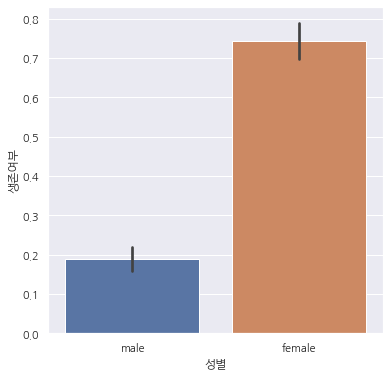

In [117]:
sns.barplot(x='성별',y='생존여부',data=titanic_df)

<AxesSubplot:xlabel='선실등급', ylabel='생존여부'>

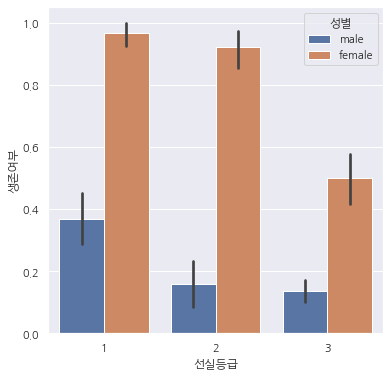

In [123]:
sns.barplot(x='선실등급',y='생존여부',hue='성별',data=titanic_df)